### Linear Regression

In [9]:
class LinearRegression:
  def __init__(self, lr = 0.01, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X,self.weights) + self.bias

      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [30]:
X,y = datasets.make_regression(n_samples=100,n_features=1, noise=10, random_state=43)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
print(X_train.shape,X_test.shape)

(80, 1) (20, 1)


In [32]:
print(y_train.shape,y_test.shape)

(80,) (20,)


In [43]:
model = LinearRegression(lr=0.01)
model.fit(X_train,y_train)

In [44]:
predictions = model.predict(X_test)

In [45]:
predictions

array([ 58.83054608,  22.67346719,  39.36529527,  19.39086658,
        24.82764669, -52.56924396,  -3.63313369, -27.25853413,
        -5.4412824 ,  23.24580586,  24.09083863,  12.42959055,
        27.36578361,   7.98457819, -17.80491012, -22.61066239,
        23.38019951,  33.35848842,  25.98377898,  12.72471206])

In [46]:
def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

In [47]:
mse_value = mean_squared_error(y_test, predictions)
mse_value

35.40010949752106

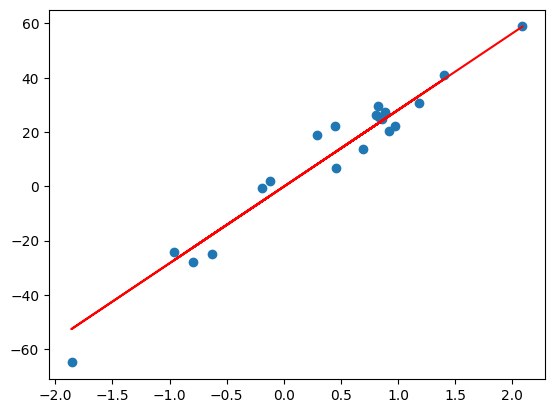

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, predictions, color='red')
plt.show()